## Importing libraries:

In [3]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

### Generating data:

In [5]:
np.random.seed(42)
x = np.random.rand(1000)
y = 2*x + 1+np.random.randn(1000)*0.5

In [6]:
df = {'x':x,'y':y}
df = pd.DataFrame(df)
df.head()

,x,y
0,0.374540,1.837931
1,0.950714,2.233756
2,0.731994,2.654087
3,0.598658,2.502610
4,0.156019,1.591933


### Split the data:

In [7]:
train_size = int(0.8*len(df))
X_train = df['x'][:train_size]
y_train = df['y'][:train_size]
X_test = df['x'][train_size:]
y_test = df['y'][train_size:]

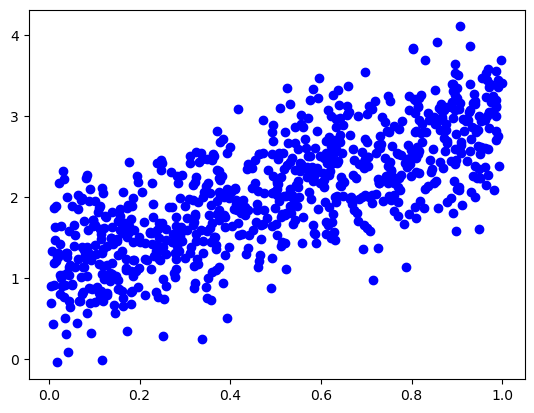

In [18]:
#plotting the train data
plt.scatter(X_train,y_train, c='blue', label='train data');

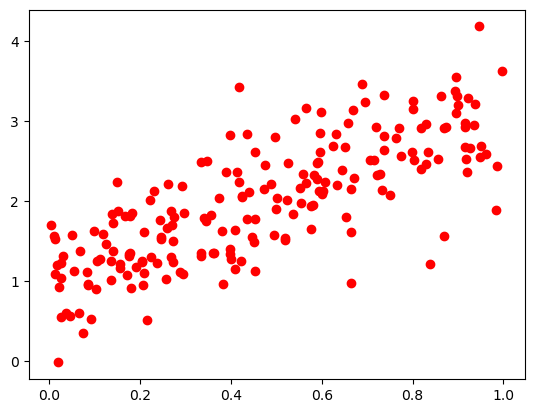

In [19]:
# plotting the test data
plt.scatter(X_test,y_test, c='red', label='test data');

### Initializing values:

In [8]:
m = np.random.randn()
b = np.random.randn()

In [10]:
lr = 0.01
n_iter = 10000

### Without using sklearn:

In [11]:
# cost function
def cost_func(x,y,m,b):
    return np.mean((y-(m*x+b))**2)

In [12]:
# gradient descent
for i in range(n_iter):
    m_grad = -2*np.mean(X_train*(y_train-(m*X_train+b)))
    b_grad = -2*np.mean(y_train-(m*X_train+b))
    
    m-=m_grad*lr
    b-=b_grad*lr
    
    if i%50==0:
        print(f"Iterations:{i}\tCost:{cost_func(X_train,y_train,m,b)}")

Iterations:0	Cost:8.716799335365671
Iterations:50	Cost:1.1946130057687032
Iterations:100	Cost:0.5768231042844097
Iterations:150	Cost:0.4962223528160203
Iterations:200	Cost:0.4612406334868634
Iterations:250	Cost:0.4334397726181096
Iterations:300	Cost:0.409389408013312
Iterations:350	Cost:0.38841793841756894
Iterations:400	Cost:0.3701183243861649
Iterations:450	Cost:0.35414916583332157
Iterations:500	Cost:0.3402136026372766
Iterations:550	Cost:0.32805266032165575
Iterations:600	Cost:0.31744034976948915
Iterations:650	Cost:0.30817946087123543
Iterations:700	Cost:0.30009789721994806
Iterations:750	Cost:0.2930454779792791
Iterations:800	Cost:0.2868911470487333
Iterations:850	Cost:0.28152053762944945
Iterations:900	Cost:0.2768338469298405
Iterations:950	Cost:0.27274398151625634
Iterations:1000	Cost:0.26917493884343174
Iterations:1050	Cost:0.2660603948884805
Iterations:1100	Cost:0.26334247164223223
Iterations:1150	Cost:0.26097066155403204
Iterations:1200	Cost:0.25890088894280927
Iterations:12

In [13]:
print("Final slope from gradient descent: ", m)
print("Final intercept from gradient descent: ", b)

Final slope from gradient descent:  1.883316180913694
Final intercept from gradient descent:  1.1047300251261924


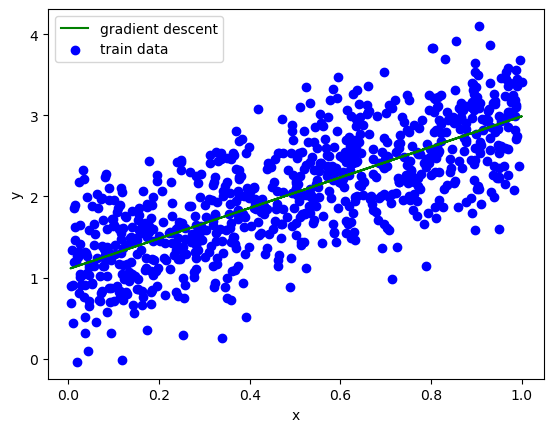

In [22]:
plt.plot(X_train, m*X_train + b, c='green', label='gradient descent')
plt.scatter(X_train, y_train, c='blue', label='train data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Using sklearn:

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(df[['x']], df['y'])
m1 = reg.coef_[0]
b1 = reg.intercept_
print("Final slope from sklearn: ",m1)
print("Final intercept from sklearn: ", b1)

Final slope from sklearn:  1.9226074184723283
Final intercept from sklearn:  1.0873901292465504


### Evaluating the Models:

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
# RMSE for the model without using gradient descent
y_pred = m*X_test + b
rmse_gd = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE for gradient descent: ", rmse_gd)

RMSE for gradient descent:  0.4904253580629867


In [26]:
# RMSE for the model using sklearn
y_pred1 = m1*X_test + b1
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
print("RMSE for gradient descent: ", rmse)

RMSE for gradient descent:  0.48917247649109274
